# **MNIST_Handwritten_Digits-STARTER**

# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [3]:
!python -m pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.4 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


**Important: Restart the Kernel at this moment**

## Imports

In [4]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [5]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Create training set and define training dataloader
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Create test set and define test dataloader
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 348kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.17MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.17MB/s]


## Justify your preprocessing

The dataset is transformed using `ToTensor()` to convert PIL images to PyTorch tensors, which is a requirement for neural network input. i also normalize the pixel values to a range of [-1, 1] using `Normalize((0.5,), (0.5,))` to improve convergence and performance during training.


**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [6]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Training data shape: torch.Size([64, 1, 28, 28])
Test data shape: torch.Size([64, 1, 28, 28])
8


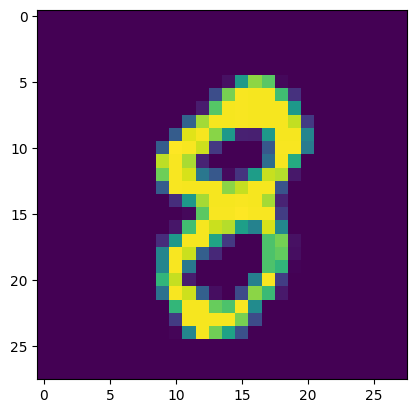

8


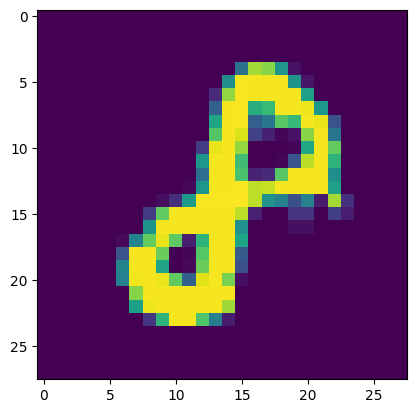

2


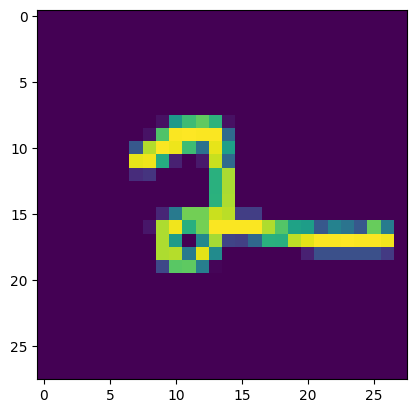

9


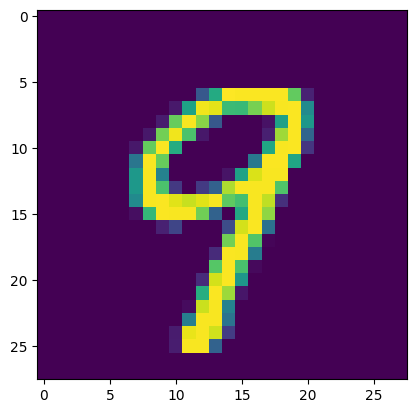

3


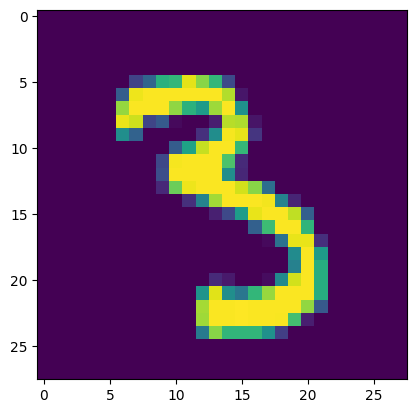

In [7]:
# Explore data
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(f"Training data shape: {images.shape}")
print(f"Test data shape: {next(iter(testloader))[0].shape}")

# Show 5 sample images
show5(trainloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [10]:
class NNModel(nn.Module):
    def __init__(self):
        super(NNModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)  # Flatten input
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)
        return x

model = NNModel()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [11]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model.to(device)

Using device: cpu


NNModel(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [15]:
train_losses = []
train_accuracies = []
epochs = 5

for epoch in range(epochs):
    running_loss = 0
    correct = 0
    total = 0

    model.train()

    for batch_idx, (images, labels) in enumerate(trainloader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Accuracy calculation
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if (batch_idx + 1) % 250 == 0 or (batch_idx + 1) == len(trainloader):
            print(f"Epoch {epoch+1} | Batch {batch_idx+1} | Loss: {loss.item():.4f}")

    average_loss = running_loss / len(trainloader)
    accuracy = 100 * correct / total

    train_losses.append(average_loss)
    train_accuracies.append(accuracy)

    print(f"Epoch {epoch+1} completed. Avg Loss: {average_loss:.4f}, Accuracy: {accuracy:.2f}%")


Epoch 1 | Batch 250 | Loss: 0.1321
Epoch 1 | Batch 500 | Loss: 0.0694
Epoch 1 | Batch 750 | Loss: 0.1108
Epoch 1 | Batch 938 | Loss: 0.2270
Epoch 1 completed. Avg Loss: 0.1049, Accuracy: 96.80%
Epoch 2 | Batch 250 | Loss: 0.1319
Epoch 2 | Batch 500 | Loss: 0.0741
Epoch 2 | Batch 750 | Loss: 0.1941
Epoch 2 | Batch 938 | Loss: 0.0479
Epoch 2 completed. Avg Loss: 0.0995, Accuracy: 96.92%
Epoch 3 | Batch 250 | Loss: 0.0935
Epoch 3 | Batch 500 | Loss: 0.1468
Epoch 3 | Batch 750 | Loss: 0.1338
Epoch 3 | Batch 938 | Loss: 0.0281
Epoch 3 completed. Avg Loss: 0.0911, Accuracy: 97.17%
Epoch 4 | Batch 250 | Loss: 0.0521
Epoch 4 | Batch 500 | Loss: 0.0832
Epoch 4 | Batch 750 | Loss: 0.0522
Epoch 4 | Batch 938 | Loss: 0.1176
Epoch 4 completed. Avg Loss: 0.0871, Accuracy: 97.28%
Epoch 5 | Batch 250 | Loss: 0.0679
Epoch 5 | Batch 500 | Loss: 0.0231
Epoch 5 | Batch 750 | Loss: 0.0492
Epoch 5 | Batch 938 | Loss: 0.0744
Epoch 5 completed. Avg Loss: 0.0818, Accuracy: 97.43%


Plot the training loss (and validation loss/accuracy, if recorded).

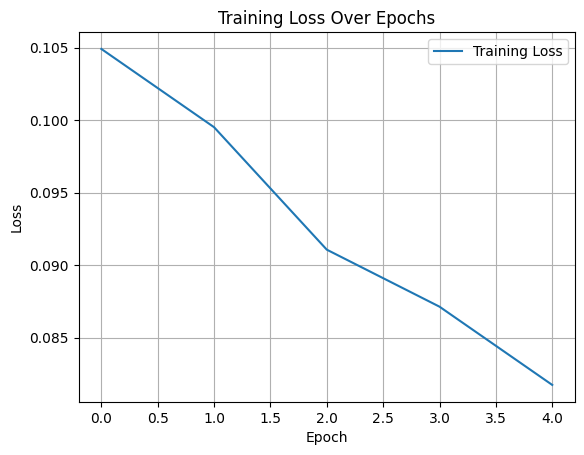

In [16]:
#Training Loss curve
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

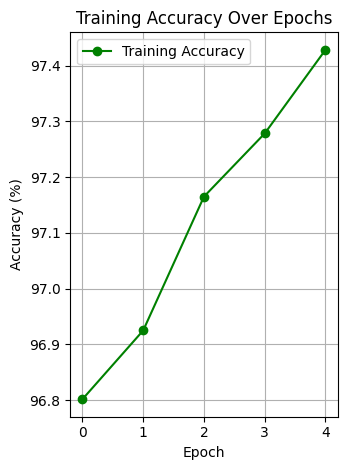

In [17]:
#Training Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [18]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 96.53%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [24]:
# Hyperparameters
epochs = 20  # Increased from 5
learning_rate = 0.001  # Reduced from 0.003

# Rebuild model and optimizer with new learning rate
model = NNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []
train_accuracies = []

for epoch in range(epochs):
    running_loss = 0
    correct = 0
    total = 0

    model.train()
    for batch_idx, (images, labels) in enumerate(trainloader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if (batch_idx + 1) % 250 == 0 or (batch_idx + 1) == len(trainloader):
            print(f"Epoch {epoch+1} | Batch {batch_idx+1} | Loss: {loss.item():.4f}")

    avg_loss = running_loss / len(trainloader)
    accuracy = 100 * correct / total
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)

    print(f"Epoch {epoch+1} completed. Avg Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

Epoch 1 | Batch 250 | Loss: 0.3667
Epoch 1 | Batch 500 | Loss: 0.1237
Epoch 1 | Batch 750 | Loss: 0.3249
Epoch 1 | Batch 938 | Loss: 0.3975
Epoch 1 completed. Avg Loss: 0.3835, Accuracy: 88.66%
Epoch 2 | Batch 250 | Loss: 0.1250
Epoch 2 | Batch 500 | Loss: 0.0467
Epoch 2 | Batch 750 | Loss: 0.2812
Epoch 2 | Batch 938 | Loss: 0.3140
Epoch 2 completed. Avg Loss: 0.1841, Accuracy: 94.38%
Epoch 3 | Batch 250 | Loss: 0.1598
Epoch 3 | Batch 500 | Loss: 0.3066
Epoch 3 | Batch 750 | Loss: 0.0532
Epoch 3 | Batch 938 | Loss: 0.0264
Epoch 3 completed. Avg Loss: 0.1339, Accuracy: 95.85%
Epoch 4 | Batch 250 | Loss: 0.1212
Epoch 4 | Batch 500 | Loss: 0.2073
Epoch 4 | Batch 750 | Loss: 0.0504
Epoch 4 | Batch 938 | Loss: 0.0306
Epoch 4 completed. Avg Loss: 0.1095, Accuracy: 96.66%
Epoch 5 | Batch 250 | Loss: 0.0886
Epoch 5 | Batch 500 | Loss: 0.0154
Epoch 5 | Batch 750 | Loss: 0.1334
Epoch 5 | Batch 938 | Loss: 0.0080
Epoch 5 completed. Avg Loss: 0.0913, Accuracy: 97.15%
Epoch 6 | Batch 250 | Loss: 0.

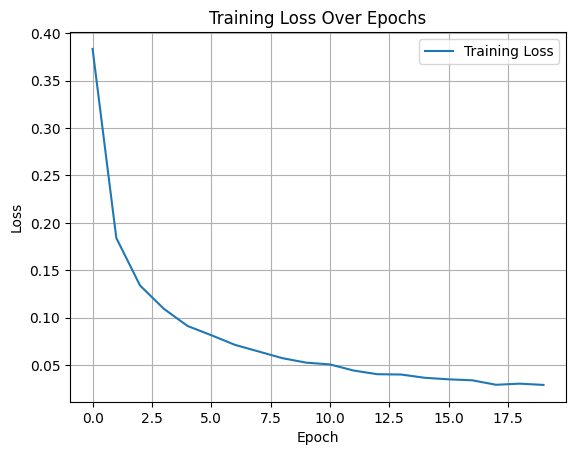

In [25]:
#Training Loss curve after improving
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

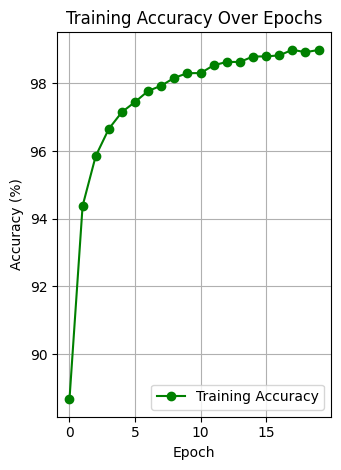

In [26]:
#Training Accuracy curve after improving
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [27]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Improved Test Accuracy: {accuracy:.2f}%")

Improved Test Accuracy: 97.37%


The model was improved by increasing the training epochs from 5 to 20 and lowering the learning rate from 0.003 to 0.001. These changes increased the test accuracy from 96.53% to 97.37%.

## Saving your model
Using `torch.save`, save your model for future loading.

In [28]:
torch.save(model.state_dict(), 'mnist_trained_model.pth')